# Stefan Spataro

## Research question/interests

**How does the stock price of a tech company compare to the stock price of its competitors at a certain time?** For example, if Apple (AAPL: NASDAQ) and Microsoft (MSFT: NASDAQ) have common price increases, and say APPL increases by 10%, could we discover more details about the market price of MSFT? Factors we could analyze could be the difference in price increases, volume of stocks traded, and time of continuously increasing prices. This data analysis could output relevant results to help investors make decisions when researching opportunities in the tech sector. After conducting an EDA into both MSFT and AAPL dataframes, I realize I may not be able to discover as much information as I previously thought. However, my goal is to analyze more into the percent change between the two companies to discover more information about their relation.

**imports:** pandas, numpy, seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display_html
from matplotlib.pyplot import figure
from matplotlib.dates import YearLocator, DateFormatter

**Import data**

In [2]:
df1 = pd.read_csv("../data/raw/AAPL.csv")
df2 = pd.read_csv("../data/raw/MSFT.csv")

df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690725,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545338,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300467,50559700


In [3]:
df1.shape

(3271, 7)

In [4]:
df2.shape

(3271, 7)

In [5]:
df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690725,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545338,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300467,50559700


In [6]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**open/closing:** narrow down graph to date, open, close, and pct_change columns

In [8]:
df1['Open'].unique()

array([  7.6225  ,   7.664286,   7.656429, ..., 131.380005, 129.669998,
       127.989998])

In [9]:
df2['Open'].unique()

array([ 30.620001,  30.85    ,  30.879999, ..., 238.699997, 236.889999,
       235.649994])

In [10]:
df1['Close'].unique()

array([  7.643214,   7.656429,   7.534643, ..., 130.029999, 126.040001,
       129.610001])

In [11]:
df2['Close'].unique()

array([ 30.950001,  30.959999,  30.77    , ..., 236.960007, 234.529999,
       241.009995])

**change:** referenced: https://practicaldatascience.co.uk/data-science/how-to-calculate-percentage-change-between-columns-in-pandas#:~:text=Pandas%2C%20rather%20helpfully%2C%20includes%20a,one%20row%20and%20the%20next.

In [12]:
df1['pct_change'] = df1[['Open', 'Close']].pct_change(axis=1)['Close']
df1 = df1.loc[:,['Date', 'Open', 'Close', 'pct_change']]

df2['pct_change'] = df2[['Open', 'Close']].pct_change(axis=1)['Close']
df2 = df2.loc[:,['Date', 'Open', 'Close', 'pct_change']]

df1.to_csv('../data/processed/AAPL_OpenClosePct_Analysis2.csv')
df2.to_csv('../data/processed/MSFT_OpenClosePct_Analysis2.csv')

df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Date,Open,Close,pct_change
0,2010-01-04,7.622500,7.643214,0.002717
1,2010-01-05,7.664286,7.656429,-0.001025
2,2010-01-06,7.656429,7.534643,-0.015906
3,2010-01-07,7.562500,7.520714,-0.005525
4,2010-01-08,7.510714,7.570714,0.007989
,Date,Open,Close,pct_change
0,2010-01-04,30.620001,30.950001,0.010777
1,2010-01-05,30.850000,30.959999,0.003566
2,2010-01-06,30.879999,30.770000,-0.003562
3,2010-01-07,30.629999,30.450001,-0.005877


In [13]:
big_apple = df1['pct_change'].max()
big_apple

0.08696110100301047

In [14]:
big_microsoft = df2['pct_change'].max()
big_microsoft

0.08102449521028587

In [15]:
d = np.where(df1['pct_change'] == big_apple)
d[0][0]

1419

In [16]:
d = np.where(df2['pct_change'] == big_microsoft)
d[0][0]

3057

## **30-Day moving averages:** 
the average price of the recent 30 days

In [17]:
df1['30D move'] = df1['Close'].rolling(window=30).mean()
df2['30D move'] = df2['Close'].rolling(window=30).mean()

df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)


,Date,Open,Close,pct_change,30D move
0,2010-01-04,7.622500,7.643214,0.002717,nan
1,2010-01-05,7.664286,7.656429,-0.001025,nan
2,2010-01-06,7.656429,7.534643,-0.015906,nan
3,2010-01-07,7.562500,7.520714,-0.005525,nan
4,2010-01-08,7.510714,7.570714,0.007989,nan
,Date,Open,Close,pct_change,30D move
0,2010-01-04,30.620001,30.950001,0.010777,nan
1,2010-01-05,30.850000,30.959999,0.003566,nan
2,2010-01-06,30.879999,30.770000,-0.003562,nan
3,2010-01-07,30.629999,30.450001,-0.005877,nan


In [18]:
df1['30D %chg'] = df1['pct_change'].rolling(window=30).mean()
df2['30D %chg'] = df2['pct_change'].rolling(window=30).mean()

**cleaned up rows with null values**

In [19]:
df1 = df1.tail(df1.shape[0] - 29)
df2 = df2.tail(df2.shape[0] - 29)

df1.to_csv('../data/processed/AAPL_30dMove_30dPct_Analysis2.csv')
df2.to_csv('../data/processed/MSFT_30dMove_30dPct_Analysis2.csv')

df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Date,Open,Close,pct_change,30D move,30D %chg
29,2010-02-16,7.212143,7.264286,0.007230,7.275952,-0.003537
30,2010-02-17,7.292500,7.233929,-0.008032,7.262310,-0.003895
31,2010-02-18,7.201071,7.247500,0.006448,7.248679,-0.003646
32,2010-02-19,7.209286,7.202500,-0.000941,7.237607,-0.003147
33,2010-02-22,7.226429,7.157857,-0.009489,7.225512,-0.003279
,Date,Open,Close,pct_change,30D move,30D %chg
29,2010-02-16,28.129999,28.350000,0.007821,29.409000,-0.002712
30,2010-02-17,28.530001,28.590000,0.002103,29.330333,-0.003001
31,2010-02-18,28.590000,28.969999,0.013291,29.264000,-0.002677
32,2010-02-19,28.790001,28.770000,-0.000695,29.197333,-0.002582


**format date**

In [20]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df1['Date'])

**30 Day average chart over time:**

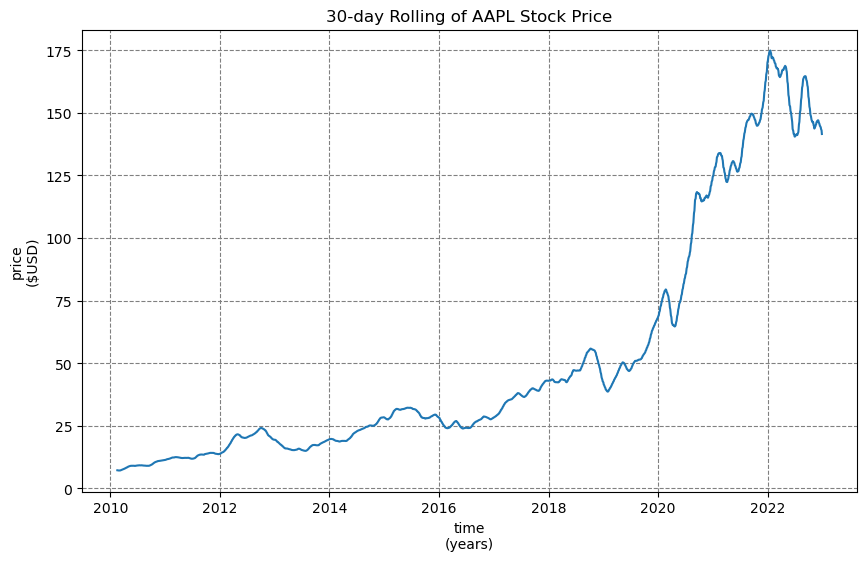

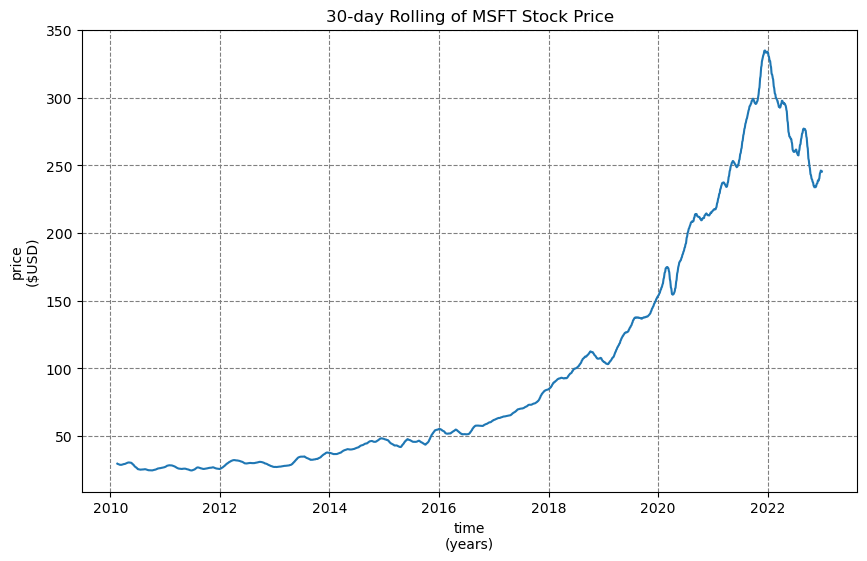

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='30D move', data=df1)
plt.title('30-day Rolling of AAPL Stock Price')
plt.xlabel('time\n(years)')
plt.ylabel('price\n($USD)')
plt.grid(linestyle = '--', color = 'gray')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='30D move', data=df2)
plt.title('30-day Rolling of MSFT Stock Price')
plt.xlabel('time\n(years)')
plt.ylabel('price\n($USD)')
plt.grid(linestyle = '--', color = 'gray')
plt.show()

**summary:**
after comparing the 30 day rolling prices of AAPL and MSFT, I will be able to further analyze the difference in percent change between the two companies. This can provide insight into whether there was a tech industry incline, or a competition between the AAPL and MSFT.

## **30-Day moving percent changes**
percent change over the previous 30 market days

**merge dataframes into new mid dataframe with % change values**

In [22]:
mid = pd.merge(df1.loc[:, ['Date', '30D %chg']], df2.loc[:, ['Date', '30D %chg']], on= 'Date',how='inner')

mid.to_csv('../data/processed/AAPL_MSFT_30DPctChg_Analysis2.csv')

mid

,Date,30D %chg_x,30D %chg_y
0,2010-02-16,-0.003537,-0.002712
1,2010-02-17,-0.003895,-0.003001
2,2010-02-18,-0.003646,-0.002677
3,2010-02-19,-0.003147,-0.002582
4,2010-02-22,-0.003279,-0.002513
...,...,...,...
3237,2022-12-22,-0.000774,0.001915
3238,2022-12-23,-0.001863,0.001216
3239,2022-12-27,-0.003092,0.000407
3240,2022-12-28,-0.003871,0.000136


**Graph DataFrames**

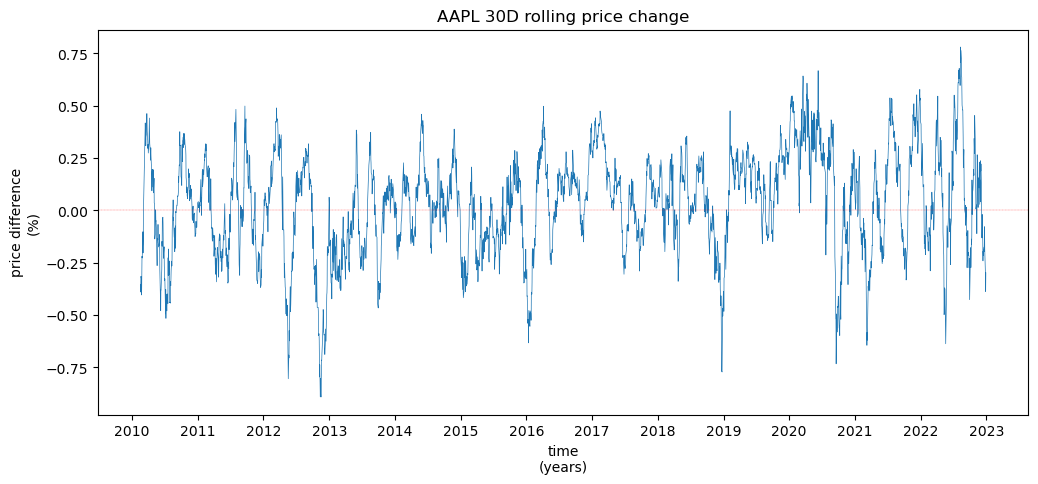

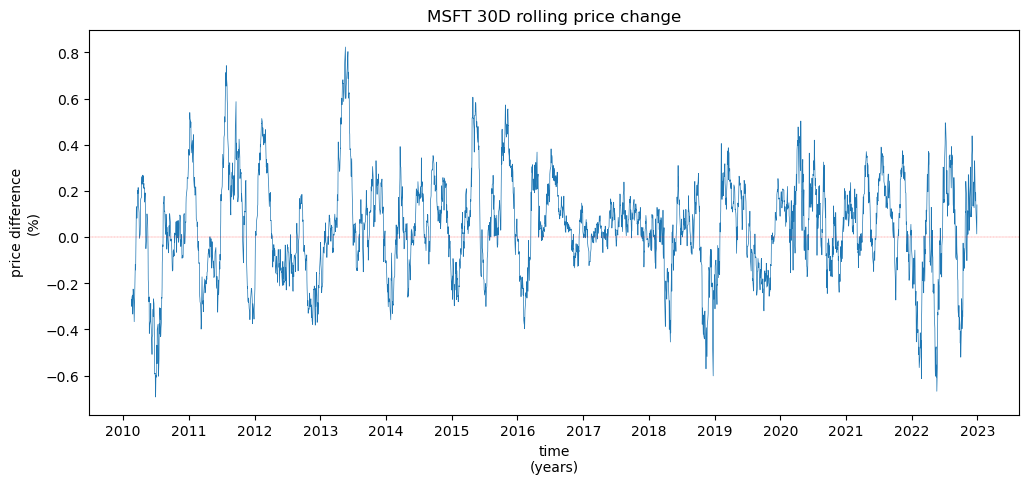

In [23]:
plt.figure(figsize=(12,5))
plt.plot(mid['Date'], df1['30D %chg']*100, linewidth = 0.5)
plt.title('AAPL 30D rolling price change')
plt.xlabel('time\n(years)')
plt.ylabel('price difference\n(%)')
plt.axhline(y=0, color='r', linestyle='--', linewidth = 0.2)

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

plt.figure(figsize=(12,5))
plt.plot(mid['Date'], df2['30D %chg']*100, linewidth = 0.5)
plt.title('MSFT 30D rolling price change')
plt.xlabel('time\n(years)')
plt.ylabel('price difference\n(%)')
plt.axhline(y=0, color='r', linestyle='--', linewidth = 0.2)

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

**30D rolling price change % explanation:**
the price change as a percentage can help us understand a companies time of growth. When the data is above the 0% threshold (red line), we can conclude the companies stock value is increasing within the 30D period. However, when the data is below the threshold, the companies stock value is decreasing. Additionally, if the plotted line has a positive slope, the companies stock value may not be increasing, but increasing more than the previous market days, and vice versa for a negative slope.

**summary**: After conducting an exploratory data analysis, I am able to find valuable information from my visualizations. The data could be cleaned up by including 1-Year rolling prices and changes, so I will include that in my milestone 4. The price difference expressed as a % allows me to draw a picture of where the market was sitting at that point in time, which can be good information when doing research for investing opportunities.